ML Lab6 : Neelmani- 224161019

Question 1

For k=50: 
End of loading file
End of loading file


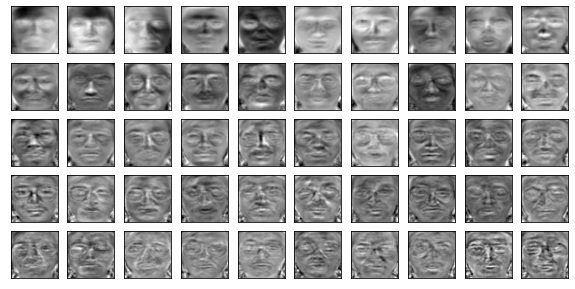

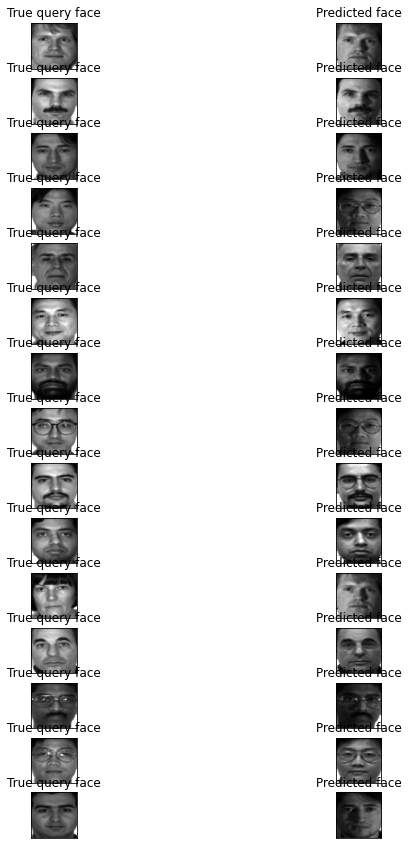

For k=75: 
End of loading file
End of loading file


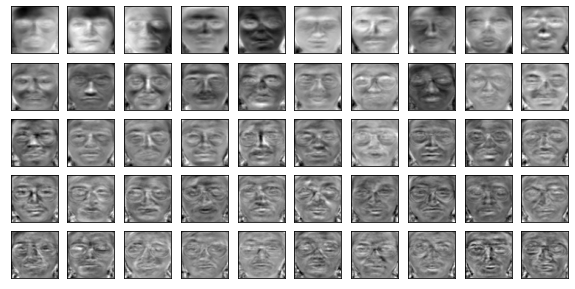

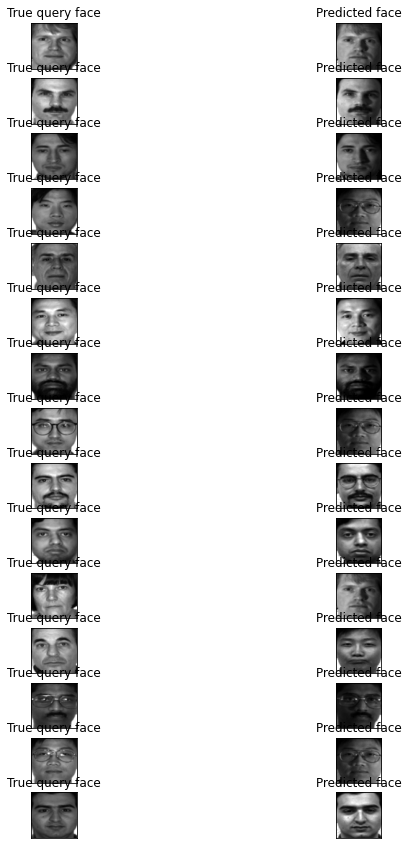

For k=100: 
End of loading file
End of loading file


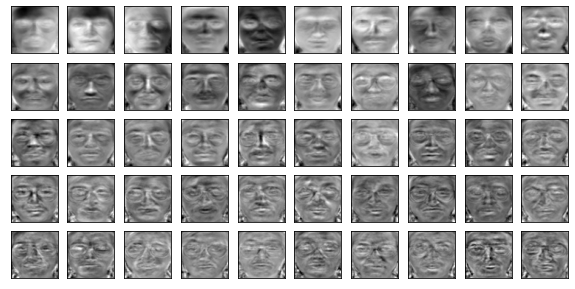

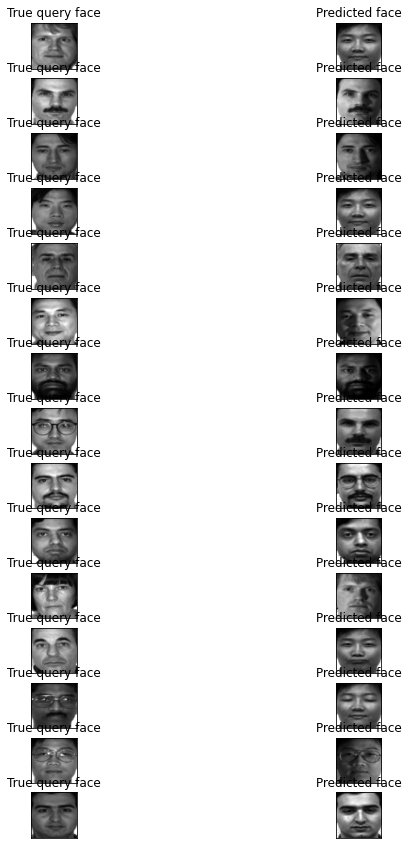

In [3]:
import os
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt


def face_recognition(n_test, k=50):
    path = r"C:\Users\Asus\Downloads\ML\LAB Assignment\Assignment 6"
    data = []
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        if os.path.isdir(folder_path):  # ignore non-directory files
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                try:
                    img = Image.open(file_path)
                    img = img.resize((64, 64))  # resize the images to 64x64
                    img = np.array(img).flatten()  # flatten the images to 1D arrays
                    data.append(img)
                except:
                    print(f"End of loading file")
    
    data = np.array(data)
    n_samples = len(data)
    n_features = data[0].size
    data = data.reshape(n_samples, n_features)
    
    # set aside 1 face per identity for testing
    test_idx = np.arange(n_test) * 11
    test_data = data[test_idx]
    train_data = np.delete(data, test_idx, axis=0)
    n_train = train_data.shape[0]

    # perform PCA on the training data
    pca = PCA(n_components=k, svd_solver='randomized', whiten=True)
    pca.fit(train_data)

    # visualize the top-K eigen faces
    fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(10, 5))
    for i, ax in enumerate(axes.flat):
        if i < k:
            ax.imshow(pca.components_[i].reshape(64, 64), cmap=plt.cm.gray)
            ax.set_xticks([])
            ax.set_yticks([])
    plt.show()

    # transform the data by projecting the mean centered samples onto the K vectors obtained using training set
    train_proj = pca.transform(train_data)
    test_proj = pca.transform(test_data)

    # find the best match for each test sample based on Euclidean distance criterion to the training vectors in the transformed K-dimensional space
    distances = euclidean_distances(test_proj, train_proj)
    min_idx = np.argmin(distances, axis=1)

    # display both the true query face and the predicted face
    fig, axes = plt.subplots(nrows=n_test, ncols=2, figsize=(10, 15))
    for i in range(n_test):
        axes[i, 0].imshow(test_data[i].reshape(64, 64), cmap=plt.cm.gray)
        axes[i, 0].set_title("True query face")
        axes[i, 0].set_xticks([])
        axes[i, 0].set_yticks([])
        axes[i, 1].imshow(train_data[min_idx[i]].reshape(64, 64), cmap=plt.cm.gray)
        axes[i, 1].set_title("Predicted face")
        axes[i, 1].set_xticks([])
        axes[i, 1].set_yticks([])
    plt.show()

# experiment with different values of K:   
print("For k=50: ")    
face_recognition(n_test=15, k=50)
print("For k=75: ") 
face_recognition(n_test=15, k=75)
print("For k=100: ") 
face_recognition(n_test=15, k=100)

Question 2

euclidean distance between C1 and C2: 4.47213595499958


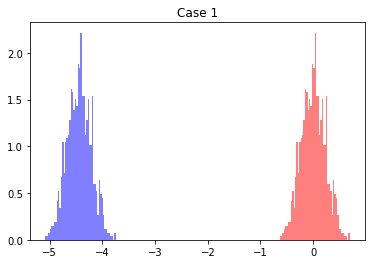

euclidean distance between C1 and C2: 1.9901004999748129


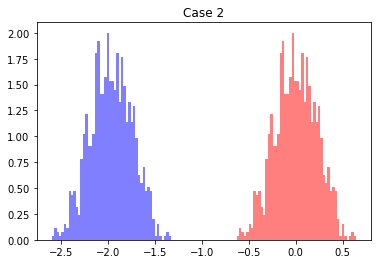

euclidean distance between C1 and C2: 1.2521980673998823


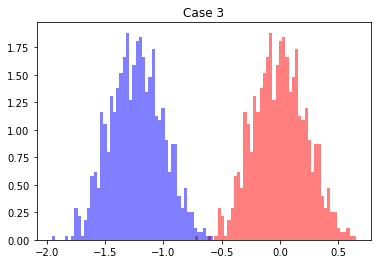

euclidean distance between C1 and C2: 0.6708203932499369


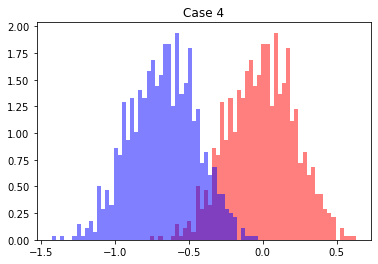

In [2]:
import numpy as np
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

def generate_data(n, d, r, C1, C2):
    S1 = np.zeros((n, d))
    S2 = np.zeros((n, d))
    for i in range(n):
        u = np.random.normal(0, 1, d)
        u /= euclidean(u, np.zeros(d))
        S1[i] = C1 + r * u
        S2[i] = C2 + r * u
    return S1, S2

def compute_centroids_and_covariances(S1, S2):
    m1 = np.mean(S1, axis=0)
    m2 = np.mean(S2, axis=0)
    C1 = np.cov(S1.T)
    C2 = np.cov(S2.T)
    return m1, m2, C1, C2

def compute_optimal_direction_vector(m1, m2, C1, C2):
    Sw = C1 + C2
    Sb = np.outer(m2 - m1, m2 - m1)
    eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    w = eigenvectors[:, 0]
    w /= np.linalg.norm(w)
    return w

def project_data(S1, S2, w):
    zS1 = S1.dot(w)
    zS2 = S2.dot(w)
    return zS1, zS2

def plot_histograms(zS1, zS2, title):
    plt.hist(zS1, bins=50, density=True, alpha=0.5, color='red')
    plt.hist(zS2, bins=50, density=True, alpha=0.5, color='blue')
    plt.title(title)
    plt.show()

# Case 1: || C1 - C2||2 > 2r
n = 1000
d = 20
r = 1
C1 = np.zeros(d)
C2 = np.ones(d) 
print(f"euclidean distance between C1 and C2: {euclidean(C1,C2)}")
S1, S2 = generate_data(n, d, r, C1, C2)
m1, m2, C1, C2 = compute_centroids_and_covariances(S1, S2)
w = compute_optimal_direction_vector(m1, m2, C1, C2)
zS1, zS2 = project_data(S1, S2, w)
plot_histograms(zS1, zS2, "Case 1")


# Case 2: || C1 - C2||2 = 2r - ε
n = 1000
d = 20
r = 1
C1 = np.zeros(d)
C2 = np.ones(d) * 0.445
print(f"euclidean distance between C1 and C2: {euclidean(C1,C2)}")
S1, S2 = generate_data(n, d, r, C1, C2)
m1, m2, C1, C2 = compute_centroids_and_covariances(S1, S2)
w = compute_optimal_direction_vector(m1, m2, C1, C2)
zS1, zS2 = project_data(S1, S2, w)
plot_histograms(zS1, zS2, "Case 2")


# Case 3: || C1 - C2||2 = 2r - ε
n = 1000
d = 20
r = 1
C1 = np.zeros(d)
C2 = np.ones(d) * 0.28
print(f"euclidean distance between C1 and C2: {euclidean(C1,C2)}")
S1, S2 = generate_data(n, d, r, C1, C2)
m1, m2, C1, C2 = compute_centroids_and_covariances(S1, S2)
w = compute_optimal_direction_vector(m1, m2, C1, C2)
zS1, zS2 = project_data(S1, S2, w)
plot_histograms(zS1, zS2, "Case 3")


# Case 4: || C1 - C2||2 < r
n = 1000
d = 20
r = 1
C1 = np.zeros(d)
C2 = np.ones(d) * 0.15
print(f"euclidean distance between C1 and C2: {euclidean(C1,C2)}")
S1, S2 = generate_data(n, d, r, C1, C2)
m1, m2, C1, C2 = compute_centroids_and_covariances(S1, S2)
w = compute_optimal_direction_vector(m1, m2, C1, C2)
zS1, zS2 = project_data(S1, S2, w)
plot_histograms(zS1, zS2, "Case 4")


OBSERVATION:
    If the distance between the centers of the two hyperspheres starts decreasing, the overlap between the two hyperspheres increases, and it becomes more difficult to distinguish the two classes based on their data points.

In Case 3, where r < ||C1 - C2||2 < 2r, the two histograms still have some separation between them, but the overlap is noticeable. As the distance between the centers decreases further, the overlap will increase, and the two histograms will become more difficult to distinguish.

In Case 4, where ||C1 - C2||2 < r, the two hyperspheres overlap significantly, and the two histograms almost completely overlap with each other. This makes it impossible to accurately distinguish between the two classes based on their data points.